<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana11/MediaMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/")
!ls

Parcial2    Semana1   Semana11	Semana3  Semana5  Semana7  Semana9
ProyectoML  Semana10  Semana2	Semana4  Semana6  Semana8


In [8]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MediaMovilData.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MediaMovilData.csv'

In [19]:
data = pd.read_csv(file)
data.head(10)
x = np.array(data['Ventas'])

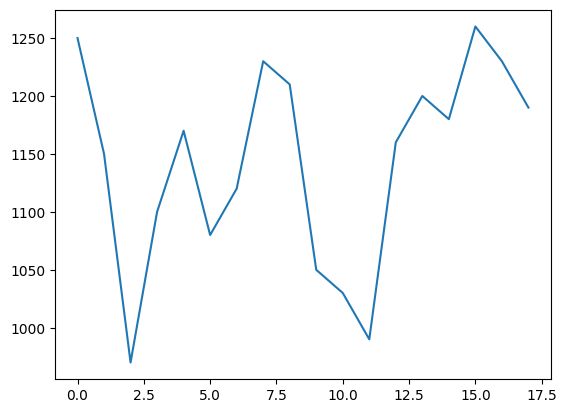

In [20]:
plt.plot(x)

In [39]:
def GetMediaMovil(x,n):

  media = np.zeros(len(x)+1)

  for i in range(len(media)):

    sum_ = 0.

   # print(i)
    if i >= n:

     ## print(i)
      for j in range(i-n,i):

        sum_ += x[j]

      media[i] = sum_/n

    else:

      media[i] = x[i]

  return media

In [56]:
media = GetMediaMovil(x,3)
#media

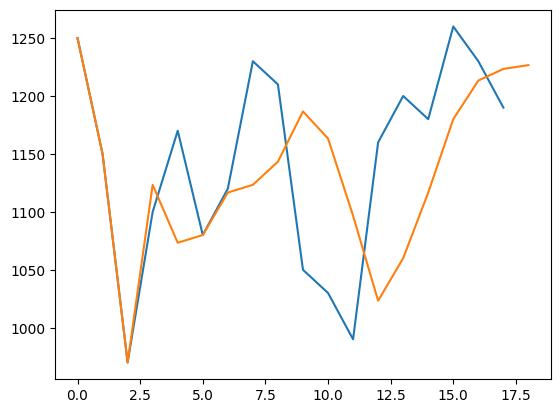

In [57]:
plt.plot(x)
plt.plot(media)

In [58]:
media[-1]

np.float64(1226.6666666666667)

In [59]:
def GetWeightedMediaMovil(x,w):

  n = len(w)

  media = np.zeros(len(x)+1)

  for i in range(len(media)):

    sum_ = 0

    if i >= n:

      k = 0
      for j in range(i-n,i):

        sum_ += w[k]*x[j]
        k += 1

      media[i] = sum_

    else:
      media[i] = x[i]

  return media

In [68]:
w = np.array([0.2,0.3,0.5])
Wmedia = GetWeightedMediaMovil(x,w)

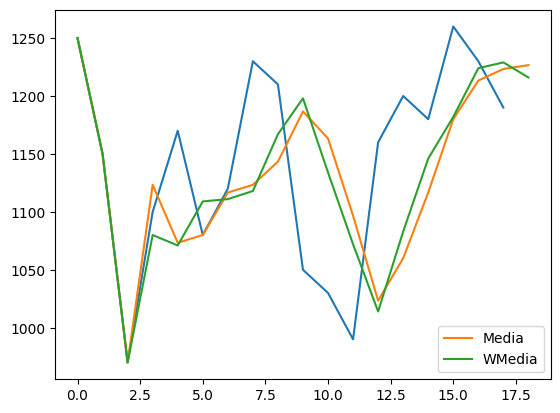

In [69]:
plt.plot(x)
plt.plot(media,label='Media')
plt.plot(Wmedia,label='WMedia')
plt.legend()

In [70]:
# Definamos la funcion de perdida
def GetError(x,y):
  return np.mean((x-y)**2)

In [71]:
def Cost(w):

  Wmedia = GetWeightedMediaMovil(x,w)
  Error = GetError(media,Wmedia)
  return Error

In [72]:
Cost(w)

np.float64(351.707602339181)

In [73]:
# Optimize recibe las restricciones
def restriccion(w):
  return np.sum(w) - 1

In [74]:
constraints = ( {'type': 'eq', 'fun': restriccion} )
bounds = [(0,1) for _ in range(len(w))]
bounds

[(0, 1), (0, 1), (0, 1)]

In [80]:
w0 = np.array([0.3,0.3,0.3])
from scipy import optimize
result = optimize.minimize(Cost,w0,constraints = constraints,bounds = bounds)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.4051409060234189e-11
       x: [ 3.333e-01  3.333e-01  3.333e-01]
     nit: 5
     jac: [ 1.692e-02  1.646e-02  1.602e-02]
    nfev: 23
    njev: 5

In [81]:
result.x

array([0.33333336, 0.33333334, 0.3333333 ])